#  <p style='text-align: center;'> Lab1 &emsp; ANLY 535 </p>

| || Group| 4||||
|:-----|------|------|------|:------|------|------:|
| Ehtesham Akhlaq Malik   |         | Kowshik Kumar Bandameedipalli   |        |  Kushboo Shah |        | Rajkumar Dhanapal |

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
print(hello)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


### Analyze the response and explain what tf.constant() command do. <br> <br><font color='navyblue'>=> We are assigning a text to variable 'hello' and then printing it. tf.constant creates a constant value which is different from regular python value. It is a tensorflow constant value.</font>

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Q1 - Use same method that explain in lecture to show first 6 elements of the dataset.

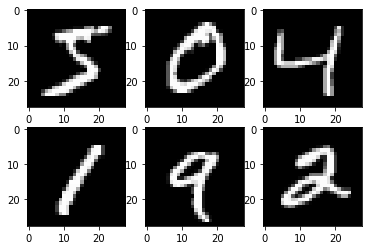

In [4]:
import matplotlib.pyplot as plt
plt.subplot(231)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Q2 - Normalize the data by dividing the values by 255

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='sigmoid', dtype='float32'), 
    tf.keras.layers.Dense(10) 
])

In [7]:
predictions= model(X_train[:1]).numpy() 
predictions

array([[ 1.153121  , -0.71141815,  0.01153202, -0.17997935, -0.74659866,
        -1.6485264 , -0.32774794,  0.06994165, -0.00715546, -0.69534516]],
      dtype=float32)

In [8]:
tf.nn.sigmoid(predictions).numpy()

array([[0.76008046, 0.32928556, 0.50288296, 0.45512623, 0.32156292,
        0.1613082 , 0.41878867, 0.5174783 , 0.49821115, 0.3328451 ]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

3.8952785

In [19]:
model.compile(optimizer='SGD', 
              loss=loss_fn, 
              metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=5)
scores_1 = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 1s 507us/step - loss: 0.3614 - accuracy: 0.8978
Epoch 2/5
1875/1875 [==============================] - 1s 499us/step - loss: 0.3484 - accuracy: 0.9008
Epoch 3/5
1875/1875 [==============================] - 1s 499us/step - loss: 0.3376 - accuracy: 0.9037
Epoch 4/5
1875/1875 [==============================] - 1s 495us/step - loss: 0.3284 - accuracy: 0.9062
Epoch 5/5
1875/1875 [==============================] - 1s 496us/step - loss: 0.3201 - accuracy: 0.9085
313/313 - 0s - loss: 0.3067 - accuracy: 0.9115


### Q3 - Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy?

In [21]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='sigmoid', dtype='float32'), 
    tf.keras.layers.Dense(128, activation='sigmoid', dtype='float32'), 
    tf.keras.layers.Dense(10) 
])
model.compile(optimizer='SGD', 
              loss=loss_fn, 
              metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=10)
#testing
scores_2 = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy of this model is %.2f%% compared to the Baseline Accuracy of %.2f%%. It changed by %.2f%%" % (scores_2[1]*100,scores_1[1]*100,scores_2[1]*100-scores_1[1]*100 ))

Epoch 1/10
1875/1875 [==============================] - 1s 509us/step - loss: 2.1960 - accuracy: 0.3697
Epoch 2/10
1875/1875 [==============================] - 1s 494us/step - loss: 1.6867 - accuracy: 0.6661
Epoch 3/10
1875/1875 [==============================] - 1s 495us/step - loss: 1.0205 - accuracy: 0.7667
Epoch 4/10
1875/1875 [==============================] - 1s 496us/step - loss: 0.7250 - accuracy: 0.8177
Epoch 5/10
1875/1875 [==============================] - 1s 539us/step - loss: 0.5858 - accuracy: 0.8472
Epoch 6/10
1875/1875 [==============================] - 1s 498us/step - loss: 0.5053 - accuracy: 0.8647
Epoch 7/10
1875/1875 [==============================] - 1s 517us/step - loss: 0.4530 - accuracy: 0.8771
Epoch 8/10
1875/1875 [==============================] - 1s 501us/step - loss: 0.4171 - accuracy: 0.8861
Epoch 9/10
1875/1875 [==============================] - 1s 498us/step - loss: 0.3912 - accuracy: 0.8918
Epoch 10/10
1875/1875 [==============================] - 1s 502u

### <font color='navyblue'>=> By increasing the epochs to 10 and adding a hidden layer, the accuracy has gone up from 89.19 to 89.48 </font>

In [13]:
# adding validation set for training
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 1s 696us/step - loss: 0.3648 - accuracy: 0.8980 - val_loss: 0.3346 - val_accuracy: 0.9038
Epoch 2/10
1500/1500 [==============================] - 1s 621us/step - loss: 0.3540 - accuracy: 0.9003 - val_loss: 0.3265 - val_accuracy: 0.9055
Epoch 3/10
1500/1500 [==============================] - 1s 612us/step - loss: 0.3448 - accuracy: 0.9021 - val_loss: 0.3188 - val_accuracy: 0.9084
Epoch 4/10
1500/1500 [==============================] - 1s 621us/step - loss: 0.3367 - accuracy: 0.9044 - val_loss: 0.3119 - val_accuracy: 0.9109
Epoch 5/10
1500/1500 [==============================] - 1s 613us/step - loss: 0.3295 - accuracy: 0.9058 - val_loss: 0.3060 - val_accuracy: 0.9122
Epoch 6/10
1500/1500 [==============================] - 1s 613us/step - loss: 0.3229 - accuracy: 0.9078 - val_loss: 0.3013 - val_accuracy: 0.9147
Epoch 7/10
1500/1500 [==============================] - 1s 619us/step - loss: 0.3168 - accuracy: 0.9095 - val_loss: 0.2951 -

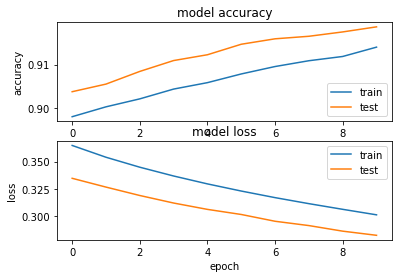

In [14]:
# plotting learning curve
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 

plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

### <font color='navyblue'>=> The accuracy of the model testing is greater than that of the model training at each epoch, which is contrary to the expected result. Thereby it shows the training model is overfit </font>

Epoch 1/10
1500/1500 [==============================] - 1s 672us/step - loss: 2.2826 - accuracy: 0.1490 - val_loss: 2.1424 - val_accuracy: 0.5171
Epoch 2/10
1500/1500 [==============================] - 1s 622us/step - loss: 2.0270 - accuracy: 0.3432 - val_loss: 1.7387 - val_accuracy: 0.6720
Epoch 3/10
1500/1500 [==============================] - 1s 608us/step - loss: 1.5181 - accuracy: 0.5551 - val_loss: 1.1680 - val_accuracy: 0.7450
Epoch 4/10
1500/1500 [==============================] - 1s 616us/step - loss: 1.0929 - accuracy: 0.6713 - val_loss: 0.8599 - val_accuracy: 0.7868
Epoch 5/10
1500/1500 [==============================] - 1s 644us/step - loss: 0.8692 - accuracy: 0.7364 - val_loss: 0.6955 - val_accuracy: 0.8288
Epoch 6/10
1500/1500 [==============================] - 1s 630us/step - loss: 0.7379 - accuracy: 0.7773 - val_loss: 0.5953 - val_accuracy: 0.8457
Epoch 7/10
1500/1500 [==============================] - 1s 621us/step - loss: 0.6548 - accuracy: 0.8017 - val_loss: 0.5308 -

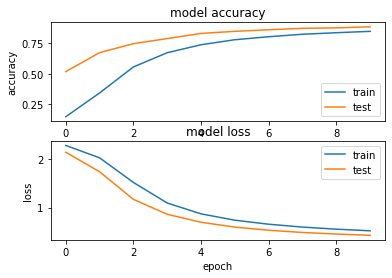

313/313 - 0s - loss: 0.4291 - accuracy: 0.8803


In [22]:
# use dropout to overcome the overfitting
# building the model
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10)])

# training the model
model.compile(optimizer='SGD', 
              loss=loss_fn, 
              metrics=['accuracy']) 
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

# plotting learning curve
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 

plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

#testing the model
scores_3 = model.evaluate(X_test, y_test, verbose=2)

### <font color='navyblue'>=> Using dropout, </font>

### Q4- Now train the model again with adding stochastic gradient descent with batch size of 200. 

Epoch 1/10
240/240 [==============================] - 0s 1ms/step - loss: 2.3530 - accuracy: 0.1068 - val_loss: 2.2823 - val_accuracy: 0.1080
Epoch 2/10
240/240 [==============================] - 0s 1ms/step - loss: 2.3194 - accuracy: 0.1190 - val_loss: 2.2616 - val_accuracy: 0.2109
Epoch 3/10
240/240 [==============================] - 0s 1ms/step - loss: 2.2957 - accuracy: 0.1373 - val_loss: 2.2394 - val_accuracy: 0.3121
Epoch 4/10
240/240 [==============================] - 0s 1ms/step - loss: 2.2704 - accuracy: 0.1546 - val_loss: 2.2154 - val_accuracy: 0.4278
Epoch 5/10
240/240 [==============================] - 0s 1ms/step - loss: 2.2433 - accuracy: 0.1810 - val_loss: 2.1880 - val_accuracy: 0.4335
Epoch 6/10
240/240 [==============================] - 0s 1ms/step - loss: 2.2147 - accuracy: 0.2074 - val_loss: 2.1556 - val_accuracy: 0.4710
Epoch 7/10
240/240 [==============================] - 0s 1ms/step - loss: 2.1793 - accuracy: 0.2405 - val_loss: 2.1175 - val_accuracy: 0.5388
Epoch 

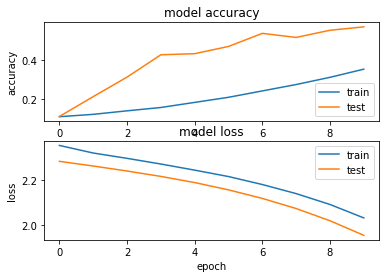

313/313 - 0s - loss: 1.9506 - accuracy: 0.5647


In [23]:
# using mini batches in training
# building the model
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10)])

# training the model
model.compile(optimizer='SGD', 
              loss=loss_fn, 
              metrics=['accuracy']) 
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=200)

# plotting learning curve
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 

plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

#testing the model
scores_4 = model.evaluate(X_test, y_test, verbose=2)

### What do you expect to be changed? Speed or accuracy? <br> <br><font color='navyblue'>=>  </font>

# Structured Data

In [24]:
import pandas as pd
file='pima-indians-diabetes.csv'
dataframe =pd.read_csv(file)
dataframe.head()

ID  preg_no  plasma  diastolic  triceps  serum  mass  pedigree  age  \
0   1        6     148         72       35      0  33.6     0.627   50   
1   2        1      85         66       29      0  26.6     0.351   31   
2   3        8     183         64        0      0  23.3     0.672   32   
3   4        1      89         66       23     94  28.1     0.167   21   
4   5        0     137         40       35    168  43.1     2.288   33   

   diabete  
0        1  
1        0  
2        1  
3        0  
4        1

In [25]:
dataframe.describe()

ID     preg_no      plasma   diastolic     triceps       serum  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean   384.500000    3.845052  120.894531   69.105469   20.536458   79.799479   
std    221.846794    3.369578   31.972618   19.355807   15.952218  115.244002   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    192.750000    1.000000   99.000000   62.000000    0.000000    0.000000   
50%    384.500000    3.000000  117.000000   72.000000   23.000000   30.500000   
75%    576.250000    6.000000  140.250000   80.000000   32.000000  127.250000   
max    768.000000   17.000000  199.000000  122.000000   99.000000  846.000000   

             mass    pedigree         age     diabete  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [26]:
y =dataframe['diabete']
X =dataframe.drop(['ID','diabete'], axis=1)

In [27]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

### Q5 - Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer.

Epoch 1/10
16/16 [==============================] - 0s 7ms/step - loss: 0.7449 - accuracy: 0.6395 - val_loss: 0.7491 - val_accuracy: 0.7073
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.7241 - accuracy: 0.6395 - val_loss: 0.7255 - val_accuracy: 0.7073
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 0.7085 - accuracy: 0.6395 - val_loss: 0.7047 - val_accuracy: 0.7073
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.6395 - val_loss: 0.6896 - val_accuracy: 0.7073
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.6395 - val_loss: 0.6765 - val_accuracy: 0.7073
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.6395 - val_loss: 0.6655 - val_accuracy: 0.7073
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.6395 - val_loss: 0.6571 - val_accuracy: 0.7073
Epoch 8/10
16/16 [==

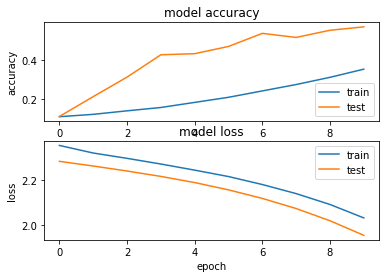

5/5 - 0s - loss: 0.6612 - accuracy: 0.6429


In [32]:
#building the model
model = tf.keras.models.Sequential([  
    tf.keras.layers.Dense(12, activation='sigmoid',dtype='float64'), 
    tf.keras.layers.Dense(8, activation='sigmoid',dtype='float64'), 
    tf.keras.layers.Dense(1,dtype='float64') 
])

#training the model
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer='SGD', 
              loss=loss_fn, 
              metrics=['accuracy']) 
model.fit(X_train, y_train, validation_split=0.2, epochs=10)

# plotting learning curve
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 

plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

#testing the model
scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
16/16 [==============================] - 0s 7ms/step - loss: 0.9634 - accuracy: 0.3849 - val_loss: 0.9542 - val_accuracy: 0.2927
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.8591 - accuracy: 0.4562 - val_loss: 0.8765 - val_accuracy: 0.2927
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 0.8103 - accuracy: 0.4705 - val_loss: 0.8144 - val_accuracy: 0.6829
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.7810 - accuracy: 0.5418 - val_loss: 0.7678 - val_accuracy: 0.7073
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 0.7496 - accuracy: 0.5703 - val_loss: 0.7329 - val_accuracy: 0.7073
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.7452 - accuracy: 0.5723 - val_loss: 0.7050 - val_accuracy: 0.7073
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.6354 - val_loss: 0.6831 - val_accuracy: 0.7073
Epoch 8/10
16/16 [==

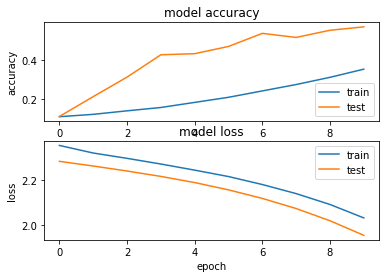

5/5 - 0s - loss: 0.6693 - accuracy: 0.6429


In [34]:
#using dropout
#building the model
model = tf.keras.models.Sequential([  
    tf.keras.layers.Dense(12, activation='sigmoid',dtype='float64'), 
    tf.keras.layers.Dropout(0.2, dtype='float64'),
    tf.keras.layers.Dense(8, activation='sigmoid',dtype='float64'),
    tf.keras.layers.Dropout(0.2, dtype='float64'),
    tf.keras.layers.Dense(1,dtype='float64') 
])

#training the model
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer='SGD', 
              loss=loss_fn, 
              metrics=['accuracy']) 
model.fit(X_train, y_train, validation_split=0.2, epochs=10)

# plotting learning curve
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 

plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

#testing the model
scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
16/16 [==============================] - 0s 7ms/step - loss: 0.7392 - accuracy: 0.5825 - val_loss: 0.7082 - val_accuracy: 0.7073
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.6273 - val_loss: 0.6747 - val_accuracy: 0.7073
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.6314 - val_loss: 0.6544 - val_accuracy: 0.7073
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.6334 - val_loss: 0.6392 - val_accuracy: 0.7073
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6415 - val_loss: 0.6306 - val_accuracy: 0.7073
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.6354 - val_loss: 0.6245 - val_accuracy: 0.7073
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6395 - val_loss: 0.6208 - val_accuracy: 0.7073
Epoch 8/10
16/16 [==

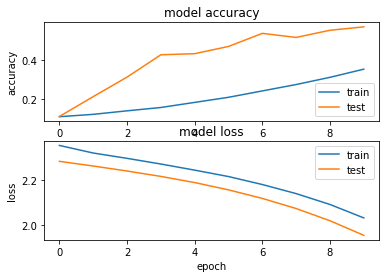

5/5 - 0s - loss: 0.6488 - accuracy: 0.6429


In [35]:
#using adam optimizer
#building the model
model = tf.keras.models.Sequential([  
    tf.keras.layers.Dense(12, activation='sigmoid',dtype='float64'), 
    tf.keras.layers.Dropout(0.2, dtype='float64'),
    tf.keras.layers.Dense(8, activation='sigmoid',dtype='float64'),
    tf.keras.layers.Dropout(0.2, dtype='float64'),
    tf.keras.layers.Dense(1,dtype='float64') 
])

#training the model
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer='adam', 
              loss=loss_fn, 
              metrics=['accuracy']) 
model.fit(X_train, y_train, validation_split=0.2, epochs=10)

# plotting learning curve
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 

plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

#testing the model
scores = model.evaluate(X_test, y_test, verbose=2)

### <font color='navyblue'>=> Using dropout and adam optimizer, </font>